## Comparing -- Gradient Descent Algorithms --

In [104]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import time

In [105]:
# Generate some data
np.random.seed(42)
m = 100000
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1) # y = 4 + 3x + noise | m = 3, b = 4

In [106]:
# Define a function to keep track of runtimes
def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"The runtime for {func.__name__}: {end_time - start_time:.4f}")
        return result
    return wrapper

In [107]:
# Transform X - add a bias term for each instance
X = np.hstack([np.ones((X.shape[0], 1)), X])

The runtime for BGD: 1.2745
Computed Params:
[[4.5705198 ]
 [2.44789115]]


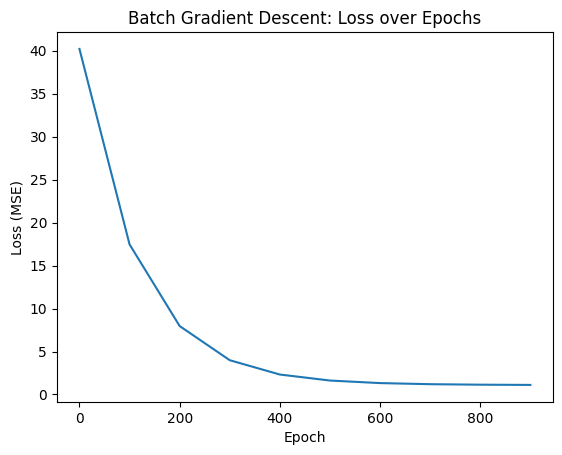

In [108]:
# Batch Gradient Descent
@timeit
def BGD(X, y, *, learning_rate=0.001, n_epochs=1000):
    theta = np.random.randn(X.shape[1], 1)

    costs = []
    epochs = []

    for epoch in range(n_epochs):
        y_preds = X @ theta
        error = y_preds - y
        gradients = 2/m * X.T @ error
        theta = theta - learning_rate * gradients

        # append loss over epochs
        if epoch % 100 == 0:
            y_pred_full = X @ theta
            loss = np.mean((y_pred_full - y)**2)
            costs.append(loss)
            epochs.append(epoch)

    return theta, costs, epochs

# Call the function
theta, costs, epochs = BGD(X, y)
print(f"Computed Params:\n{theta}")

# Plot loss over training
plt.plot(epochs, costs)
plt.title("Batch Gradient Descent: Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.show()

The runtime for SGD: 0.0146
Computed Params:
[[3.39617343]
 [3.47942412]]


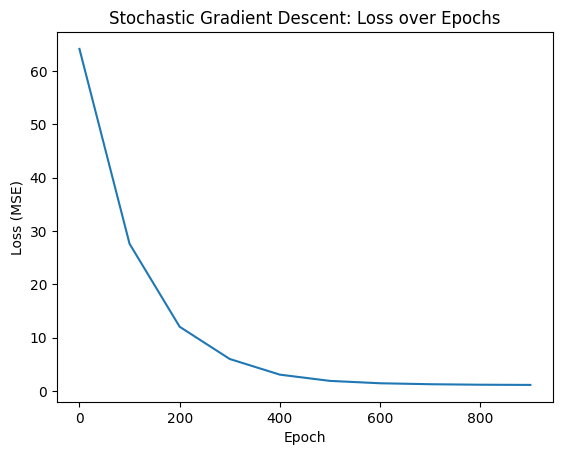

In [109]:
# Stochastic Gradient Descent
@timeit
def SGD(X, y, *, learning_rate=0.001, n_epochs=1000):
    theta = np.random.randn(X.shape[1], 1)

    costs = []
    epochs = []

    for epoch in range(n_epochs):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        y_pred = xi @ theta
        error = y_pred - yi
        gradients = 2 * xi.T @ error
        theta = theta - learning_rate * gradients

        # append loss over epochs
        if epoch % 100 == 0:
            y_pred_full = X @ theta
            loss = np.mean((y_pred_full - y)**2)
            costs.append(loss)
            epochs.append(epoch)

    return theta, costs, epochs

# Call the function
theta, costs, epochs = SGD(X, y)
print(f"Computed Params:\n{theta}")

# Plot loss over training
plt.plot(epochs, costs)
plt.title("Stochastic Gradient Descent: Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.show()

The runtime for MBGD: 1.8206
Computed Params:
[[3.16868812]
 [3.62798253]]


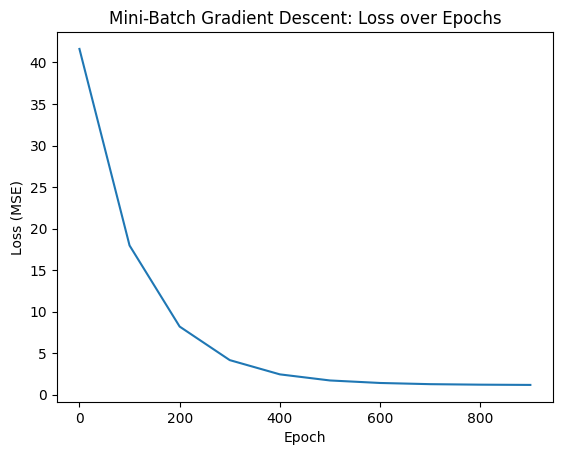

In [110]:
# Mini-Batch Gradient Descent
@timeit
def MBGD(X, y, *, learning_rate=0.001, n_epochs=1000, batch_size=32):
    theta = np.random.randn(X.shape[1], 1)

    costs = []
    epochs = []

    for epoch in range(n_epochs):
        random_samples = np.random.choice(m, batch_size, replace=False)
        xi = X[random_samples]
        yi = y[random_samples]
        y_preds = xi @ theta
        error = y_preds - yi
        gradients = 2 * xi.T @ error / batch_size # divide by 'batch_size'
        theta = theta - learning_rate * gradients

        # append loss over epochs
        if epoch % 100 == 0:
            y_pred_full = X @ theta
            loss = np.mean((y_pred_full - y)**2)
            costs.append(loss)
            epochs.append(epoch)

    return theta, costs, epochs

# Call the function
theta, costs, epochs = MBGD(X, y)
print(f"Computed Params:\n{theta}")

# Plot loss over training
plt.plot(epochs, costs)
plt.title("Mini-Batch Gradient Descent: Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.show()

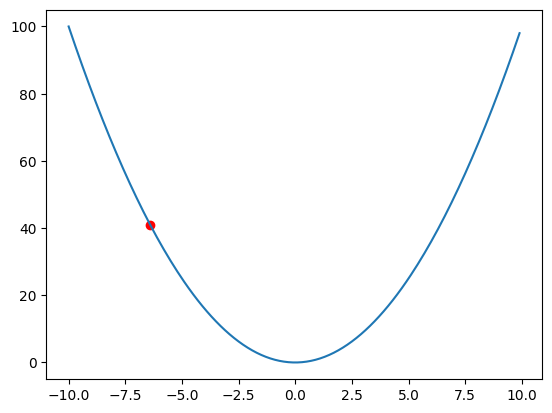

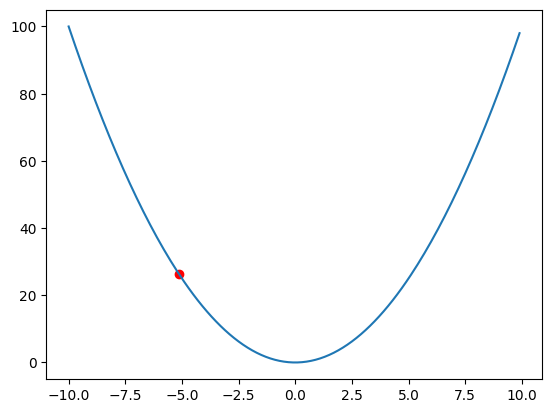

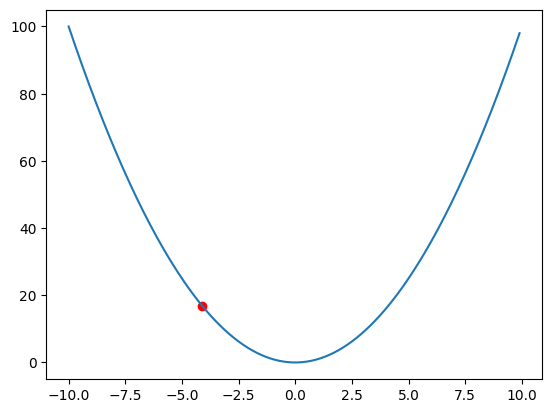

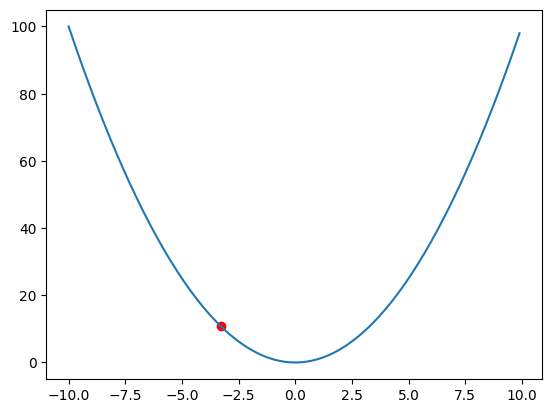

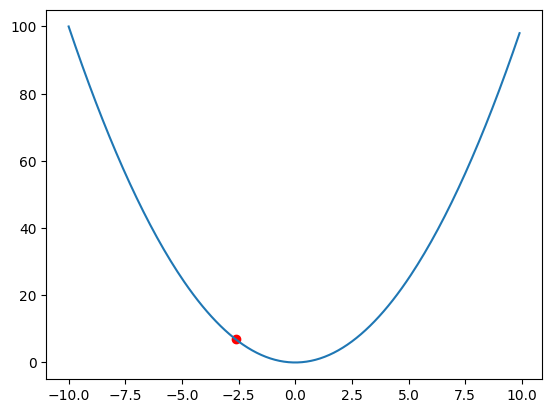

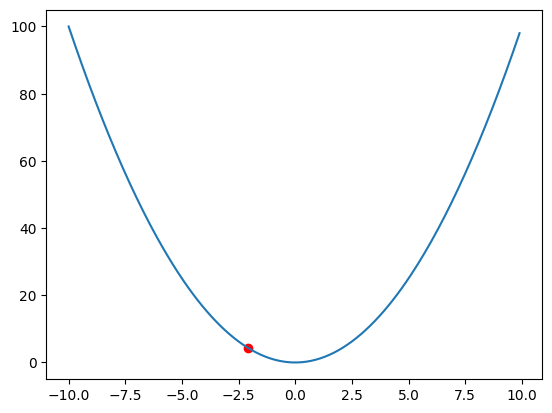

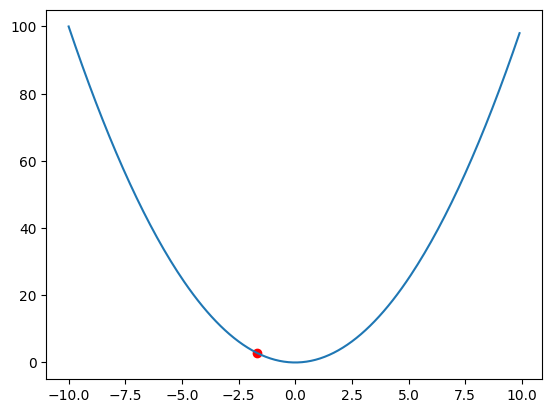

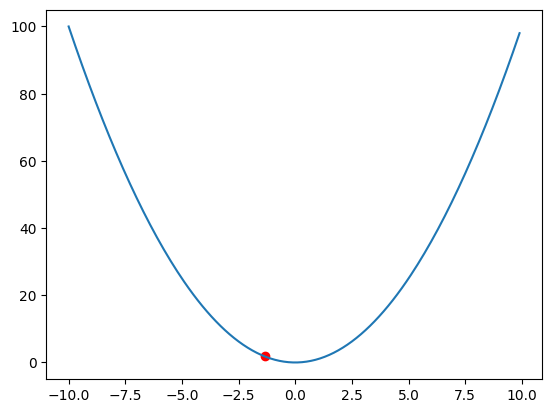

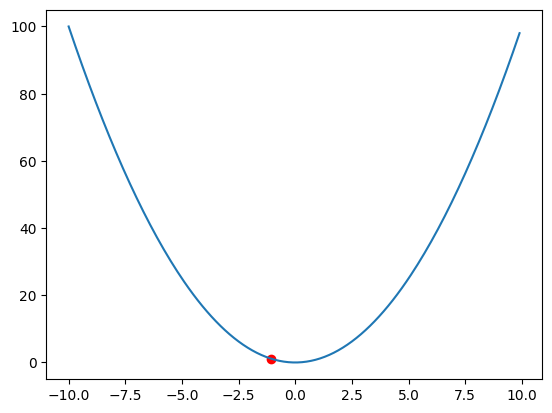

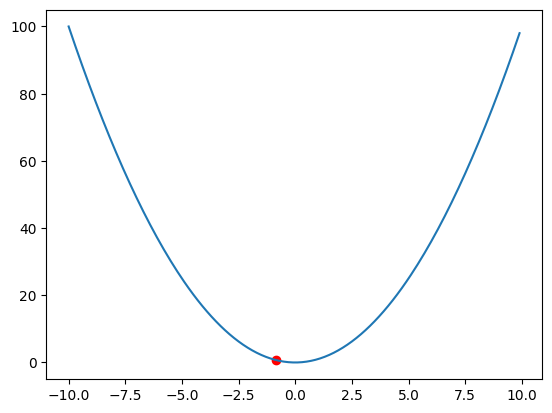

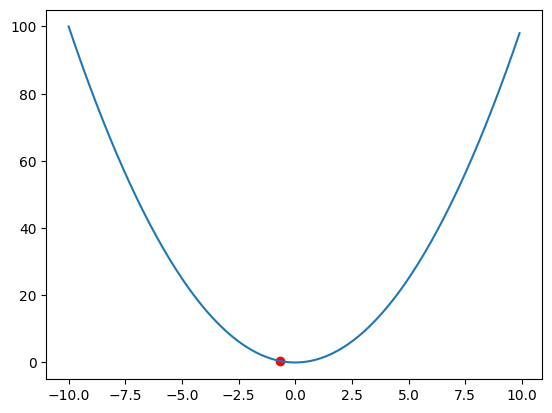

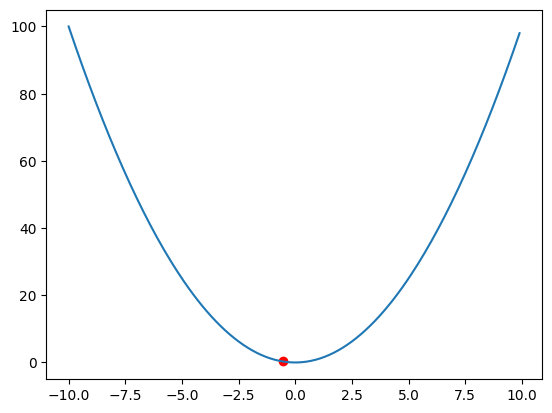

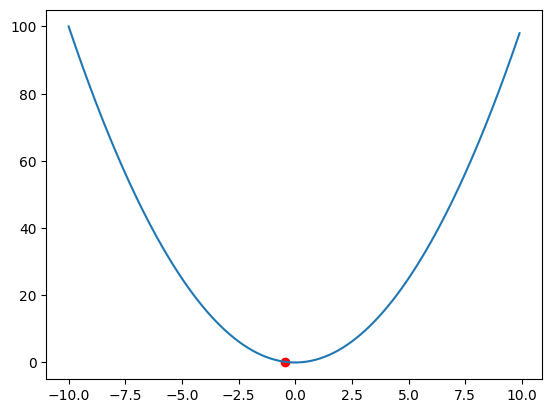

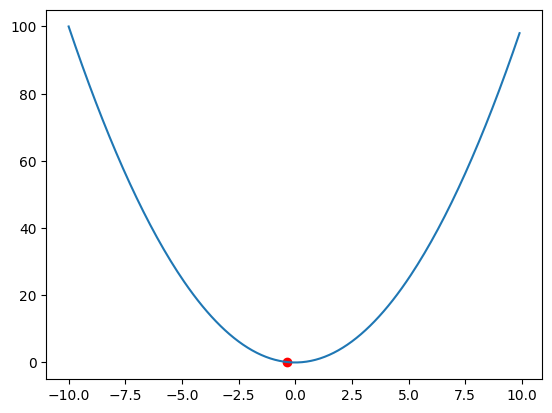

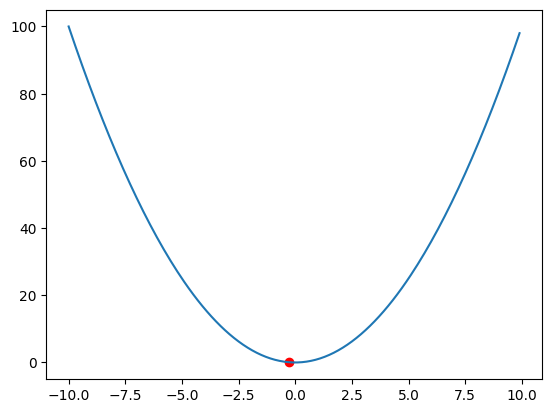

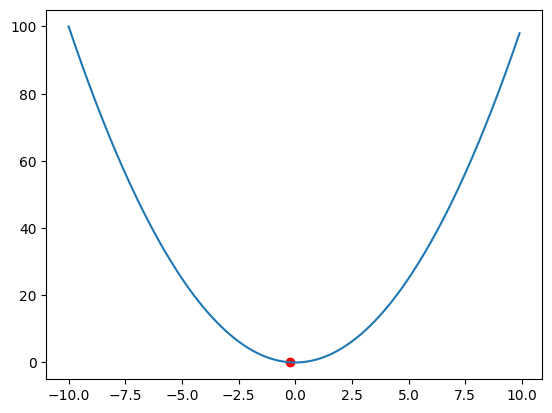

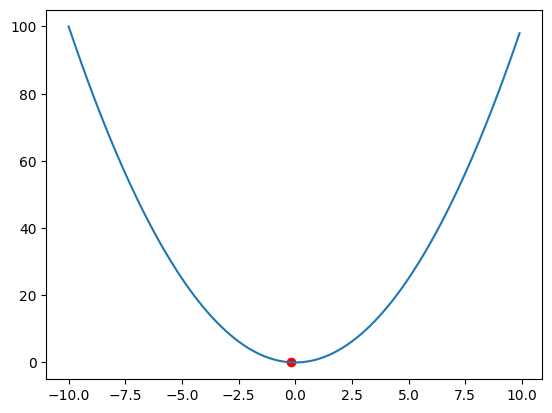

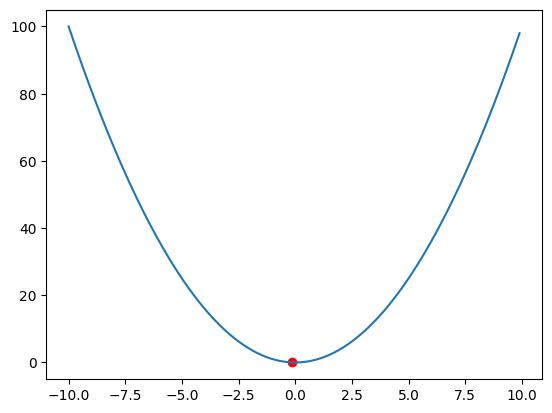

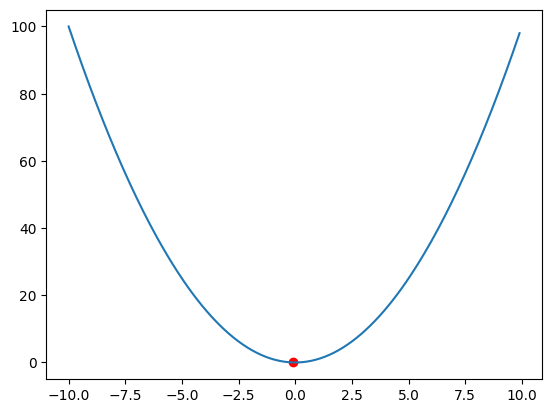

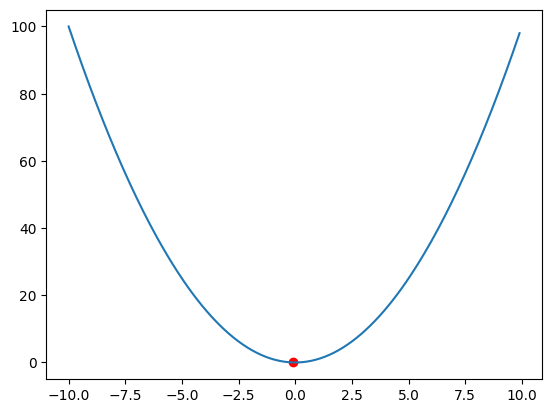

<Figure size 640x480 with 0 Axes>

In [111]:
# Visualize the convergence process
y_func = lambda x: x**2
y_deriv = lambda x: 2 * x

# Data for plotting
x = np.arange(-10, 10, 0.1)
y = y_func(x)

# Pick a random starting point
current_pos = (-8, y_func(-8))

# Init params
learning_rate = 0.1
n_epochs = 20

# Run algo
for epoch in range(n_epochs):
    new_x = current_pos[0] - learning_rate * y_deriv(current_pos[0])
    new_y = y_func(new_x)
    current_pos = (new_x, new_y)

    plt.plot(x, y)
    plt.scatter(current_pos[0], current_pos[1], color='red')
    plt.pause(0.001)
    plt.clf()

plt.show()